# Testing Pdot to see if this could be observable with LSST

In [1]:
import numpy as np
from astropy import units
from astropy.table import Table
import pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014}

In [8]:
#testing with diff fprimc factor
#BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 2, 'eddlimflag' : 0, 'fprimc_array' : [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014}

In [3]:
%load_ext autoreload
%autoreload 2

from binaryTides import *

In [4]:
#get initial values for stars from COSMIC
binary = InitialBinaryTable.InitialBinaries(m1=1, m2=1, porb=1e10, ecc=0, tphysf=1e-4, kstar1=1, kstar2=1, metallicity=0.02)
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=binary, BSEDict=BSEDict, dtp=1e-4)
b = bcm.iloc[0]
b

/Users/ageller/anaconda3/envs/EBLSST/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


tphys                     0
kstar_1                   1
mass0_1                   1
mass_1                    1
lum_1              0.628609
rad_1              0.883247
teff_1              5493.18
massc_1                   0
radc_1                    0
menv_1            0.0328902
renv_1             0.230702
epoch_1                   0
omega_spin_1        1058.98
deltam_1                  0
RRLO_1          9.47484e-08
kstar_2                   1
mass0_2                   1
mass_2                    1
lum_2              0.628609
rad_2              0.883247
teff_2              5493.18
massc_2                   0
radc_2                    0
menv_2            0.0328902
renv_2             0.230702
epoch_2                   0
omega_spin_2        1058.98
deltam_2                  0
RRLO_2          9.47484e-08
porb                  1e+10
sep             2.46015e+07
ecc                       0
B_1                       0
B_2                       0
SN_1                      0
SN_2                

In [5]:
binary = initBinary(m1 = b['mass_1']*units.solMass,
                    m2 = b['mass_2']*units.solMass,
                    m1e = b['menv_1']*units.solMass,
                    m2e = b['menv_2']*units.solMass,
                    m1c = b['massc_1']*units.solMass,
                    m2c = b['massc_2']*units.solMass,
                    r1e = b['renv_1']*units.solRad,
                    r2e = b['renv_2']*units.solRad,
                    r1c = b['radc_1']*units.solRad,
                    r2c = b['radc_2']*units.solRad,
                    omega1 = b['omega_spin_1']*units.yr**-1,
                    omega2 = b['omega_spin_2']*units.yr**-1,
                    p = 8*units.day, 
                    e=0.8)
integrator = TidesIntegrator(binary)
integrator.evolve(10*units.Gyr)

binary semi-major axis =  0.09862894142866484 AU
binary omega1 =  1058.9837892769335 1 / yr 1058.9837892769335


In [6]:
integrator.result

tphys,ecc,sma,porb,omega1,omega2
yr,,solRad,yr,1 / yr,1 / yr
float64,float64,float64,float64,float64,float64
0.0,0.8,21.20839388690998,0.02190280629705676,1058.9837892769335,1058.9837892769335
665644.3863524927,0.799,21.099635360470927,0.0217345431738455,1127.627742496252,1127.627742496252
1459673.7058319896,0.798,20.99207102100374,0.021568553597961514,1195.7388223011653,1195.7388223011653
2394202.283376173,0.797,20.885687371023163,0.02140480377613685,1263.2981565508105,1263.2981565508105
3481567.02562616,0.796,20.780471346385173,0.021243260882423697,1330.286109660119,1330.286109660119
4734337.171947343,0.795,20.676410311598215,0.021083893039354068,1396.68225654559,1396.68225654559
6165323.3616497805,0.794,20.573492055159658,0.020926669299464008,1462.4653571871288,1462.4653571871288
7787585.839561759,0.793,20.471704784844512,0.020771559627064937,1527.6133321496077,1527.6133321496077


(0.0, 3437.3322891135535)

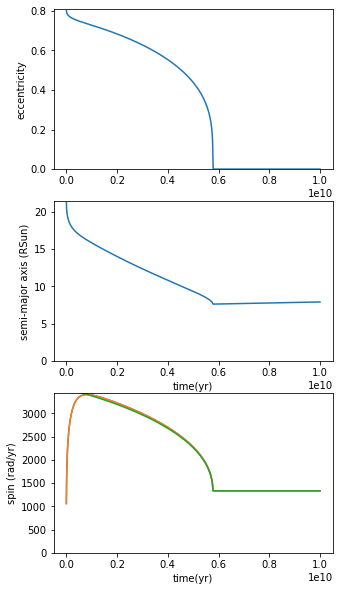

In [7]:
t = integrator.result['tphys'].to(units.yr).value
e = integrator.result['ecc']
a = integrator.result['sma'].to(units.solRad).value
p = integrator.result['porb'].to(units.yr).value
o1 = integrator.result['omega1'].to(1./units.yr).value
o2 = integrator.result['omega2'].to(1./units.yr).value

f, ax = plt.subplots(3,1, figsize=(5,10))

ax[0].plot(t,e)
ax[0].set_ylabel('eccentricity')
ax[0].set_ylim(0,1.01*max(e))

ax[1].plot(t,a)
ax[1].set_ylabel('semi-major axis (RSun)')
ax[1].set_xlabel('time(yr)')
ax[1].set_ylim(0,1.01*max(a))

ax[2].plot(t,o1)
ax[2].plot(t,o2)
ax[2].set_ylabel('spin (rad/yr)')
ax[2].set_xlabel('time(yr)')

f2 = 1. + 15./2.*e**2. +  45./8.*e**4. +   5./16.*e**6.
f5 = 1. +     3.*e**2. +   3./8.*e**4.
omega_orb = 2.*np.pi/p
omega_eq = f2*omega_orb/(f5*(1. - e**2.)**(3./2.))
ax[2].plot(t[1:],omega_eq[:-1])

#ax[2].set_ylim(0,1.01*max(spin_eq))
ax[2].set_ylim(0,1.01*max(o1))


In [9]:
single_binary = InitialBinaryTable.InitialBinaries(m1=1, 
                                                   m2=1, 
                                                   porb=8, 
                                                   ecc=0.8, 
                                                   tphysf=10000.0, 
                                                   kstar1=1, 
                                                   kstar2=1, 
                                                   metallicity=0.02)
#need to define steps for the bcm array
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict, dtp=100)

/Users/ageller/anaconda3/envs/EBLSST/lib/python3.7/site-packages/cosmic/evolve.py:534: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  output = np.array(output)


In [10]:
bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,...,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.0,1.0,1.0,1.0,1.0,21.200945,8.000000,0.8,0.549729,0.549729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,10000.0,1.0,1.0,1.0,1.0,7.554619,1.701673,0.0,0.424076,0.424076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [11]:
bcm.columns

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')

(0.0, 3389.8979109545458)

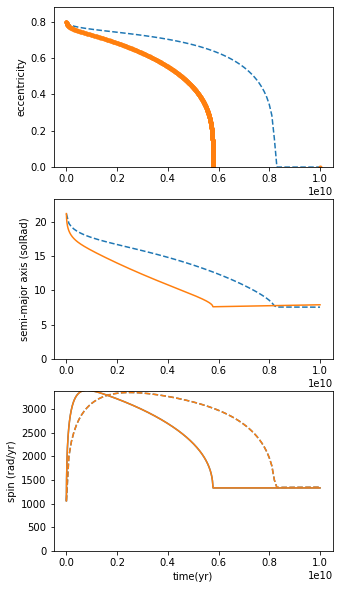

In [12]:
#comparing my calculations to COSMIC
tc = bcm['tphys'].values
ac = bcm['sep'].values
ec = bcm['ecc'].values
o1c = bcm['omega_spin_1'].values
o2c = bcm['omega_spin_2'].values

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

f, ax = plt.subplots(3,1, figsize=(5,10))

ax[0].plot(tc*1e6,ec,linestyle='dashed')
ax[0].plot(t, e,'.')
ax[0].set_ylabel('eccentricity')
ax[0].set_ylim(0,1.1*max(e))

ax[1].plot(tc*1e6,ac,linestyle='dashed')
ax[1].plot(t, a)
ax[1].set_ylabel('semi-major axis (solRad)')
ax[1].set_ylim(0,1.1*max(a))

ax[2].plot(tc*1e6,o1c, linestyle='dashed', c=colors[0])
ax[2].plot(tc*1e6,o2c, linestyle='dashed', c=colors[1])
ax[2].plot(t,o1, c=colors[0])
ax[2].plot(t,o2, c=colors[1])
ax[2].set_ylabel('spin (rad/yr)')
ax[2].set_xlabel('time(yr)')
ax[2].set_ylim(0,1.01*max(o1c))

In [13]:
#from BSE directly
df = pd.read_csv('binary.dat', header=None, sep='\s+', 
                 names=['t','k1','k2','m1','m2','x1','x2','logL1','logL2','logR1','logR2','x3','x4','omega1','omega2',
                        'x5','x6','a','e'])
df

,t,k1,k2,m1,m2,x1,x2,logL1,logL2,logR1,logR2,x3,x4,omega1,omega2,x5,x6,a,e
0,0.0000,1,1,1.0000,1.0000,0.0000,0.0000,-0.0515,-0.0515,0.1106,0.1106,-0.1563,-0.1563,1053.0,1053.0,0.000000e+00,0.000000e+00,21.200,0.800
1,142.9622,1,1,1.0000,1.0000,0.0000,0.0000,-0.0503,-0.0503,0.1453,0.1453,-0.1532,-0.1532,3504.0,3504.0,0.000000e+00,0.000000e+00,16.180,0.733
2,155.7779,1,1,1.0000,1.0000,0.0000,0.0000,-0.0502,-0.0502,0.1454,0.1454,-0.1529,-0.1529,3396.0,3396.0,0.000000e+00,0.000000e+00,16.170,0.732
3,169.4077,1,1,1.0000,1.0000,0.0000,0.0000,-0.0501,-0.0501,0.1455,0.1455,-0.1526,-0.1526,3294.0,3294.0,0.000000e+00,0.000000e+00,16.160,0.732
4,183.8898,1,1,1.0000,1.0000,0.0000,0.0000,-0.0500,-0.0500,0.1456,0.1456,-0.1522,-0.1522,3196.0,3196.0,0.000000e+00,0.000000e+00,16.150,0.732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770,11200.8135,2,2,0.9999,0.9999,0.1239,0.1239,0.2556,0.2556,0.9998,0.9998,0.3515,0.3515,2698.0,2698.0,-6.372000e-13,-6.372000e-13,4.755,0.000
4771,11200.8604,2,2,0.9999,0.9999,0.1239,0.1239,0.2556,0.2556,0.9999,0.9999,0.3515,0.3515,2699.0,2699.0,-6.372000e-13,-6.372000e-13,4.755,0.000
4772,11200.9082,2,2,0.9999,0.9999,0.1239,0.1239,0.2556,0.2556,1.0000,1.0000,0.3515,0.3515,2699.0,2699.0,0.000000e+00,0.000000e+00,4.754,0.000
4773,11200.9082,2,2,0.9999,0.9999,0.1239,0.1239,0.2556,0.2556,1.0001,1.0001,0.3515,0.3515,2701.0,2701.0,-6.372000e-13,-6.372000e-13,4.754,0.000


(0.0, 3389.8979109545458)

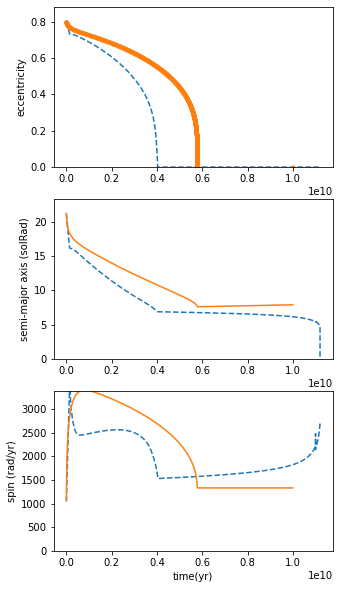

In [14]:
#comparing my calculations to "raw" BSE
tb = df['t'].values
ab = df['a'].values
eb = df['e'].values
o1b = df['omega1'].values
o2b = df['omega2'].values

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

f, ax = plt.subplots(3,1, figsize=(5,10))

ax[0].plot(tb*1e6,eb,linestyle='dashed')
ax[0].plot(t, e,'.')
ax[0].set_ylabel('eccentricity')
ax[0].set_ylim(0,1.1*max(e))

ax[1].plot(tb*1e6,ab,linestyle='dashed')
ax[1].plot(t, a)
ax[1].set_ylabel('semi-major axis (solRad)')
ax[1].set_ylim(0,1.1*max(a))

ax[2].plot(tb*1e6,o1b, linestyle='dashed')#, c=colors[0])
#ax[2].plot(tb*1e6,s2b, linestyle='dashed', c=colors[1])
ax[2].plot(t,o1)#, c=colors[0])
#ax[2].plot(t,s2, c=colors[1])
ax[2].set_ylabel('spin (rad/yr)')
ax[2].set_xlabel('time(yr)')
ax[2].set_ylim(0,1.01*max(o1c))

(0.0, 3389.8979109545458)

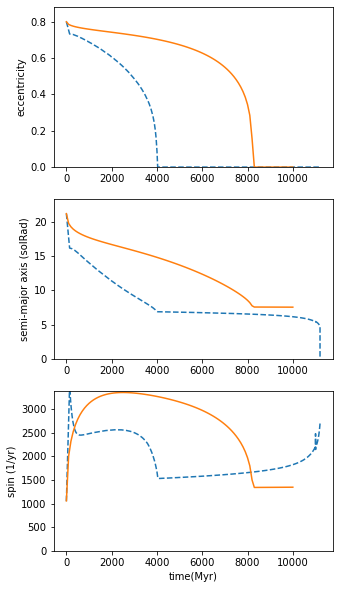

In [15]:
#comparing COSMIC to BSE
f, ax = plt.subplots(3,1, figsize=(5,10))

ax[0].plot(tb,eb,linestyle='dashed')
ax[0].plot(tc,ec)
ax[0].set_ylabel('eccentricity')
ax[0].set_ylim(0,1.1*max(e))

ax[1].plot(tb,ab,linestyle='dashed')
ax[1].plot(tc,ac)
ax[1].set_ylabel('semi-major axis (solRad)')
ax[1].set_ylim(0,1.1*max(a))

ax[2].plot(tb,o1b, linestyle='dashed')
ax[2].plot(tc,o1c)
ax[2].set_ylabel('spin (1/yr)')
ax[2].set_xlabel('time(Myr)')
ax[2].set_ylim(0,1.01*max(o1c))